In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif

In [2]:
df = pd.read_csv('train.csv', sep=',')

In [3]:
df.head(5)

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
gender                  381109 non-null object
age                     381109 non-null int64
driving_license         381109 non-null int64
region_code             381109 non-null int64
previously_insured      381109 non-null int64
vehicle_age             381109 non-null object
vehicle_damage          381109 non-null object
annual_premium          381109 non-null int64
policy_sales_channel    381109 non-null int64
vintage                 381109 non-null int64
response                381109 non-null int64
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
driving_license,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
region_code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
previously_insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
annual_premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
policy_sales_channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [7]:
df.isnull().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

In [8]:
df = df.drop(columns = 'id')

In [9]:
df.duplicated().sum()

269

In [11]:
df.vehicle_age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [13]:
df['vehicle_age'] = df['vehicle_age'].map({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2}).astype(int)

In [15]:
df['gender'] = df['gender'].map({'Male':0, 'Female':1}).astype(int)

In [16]:
df['vehicle_damage'] = df['vehicle_damage'].map({'No':0, 'Yes':1}).astype(int)

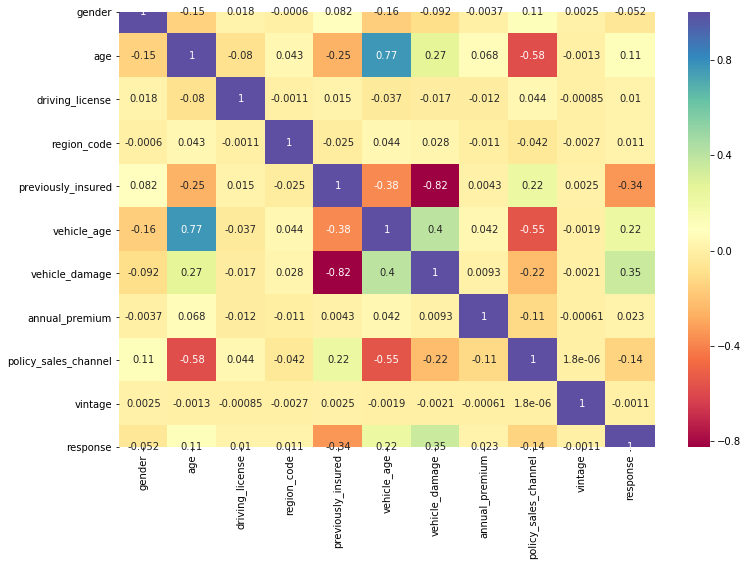

In [17]:
plt.figure(figsize=((12,8)))
sns.heatmap(df.corr(), cmap='Spectral', annot=True)

In [19]:
# Preparação para análise de informações mutuas
x = df.drop(columns='response')
y = df['response']

In [20]:
def make_mi_score(x, y):
    mi_score = mutual_info_classif(x, y, discrete_features='auto')
    mi_score = pd.Series(mi_score, index=x.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score

In [21]:
mi_scores = make_mi_score(x, y)
mi_scores

previously_insured      0.099298
vehicle_damage          0.093669
driving_license         0.074761
policy_sales_channel    0.058946
vehicle_age             0.044382
age                     0.031276
gender                  0.017848
region_code             0.014772
annual_premium          0.003697
vintage                 0.000293
dtype: float64

In [22]:
x1 = x.loc[:, mi_scores > 0.01]
x1.shape

(381109, 8)

<Figure size 864x576 with 0 Axes>

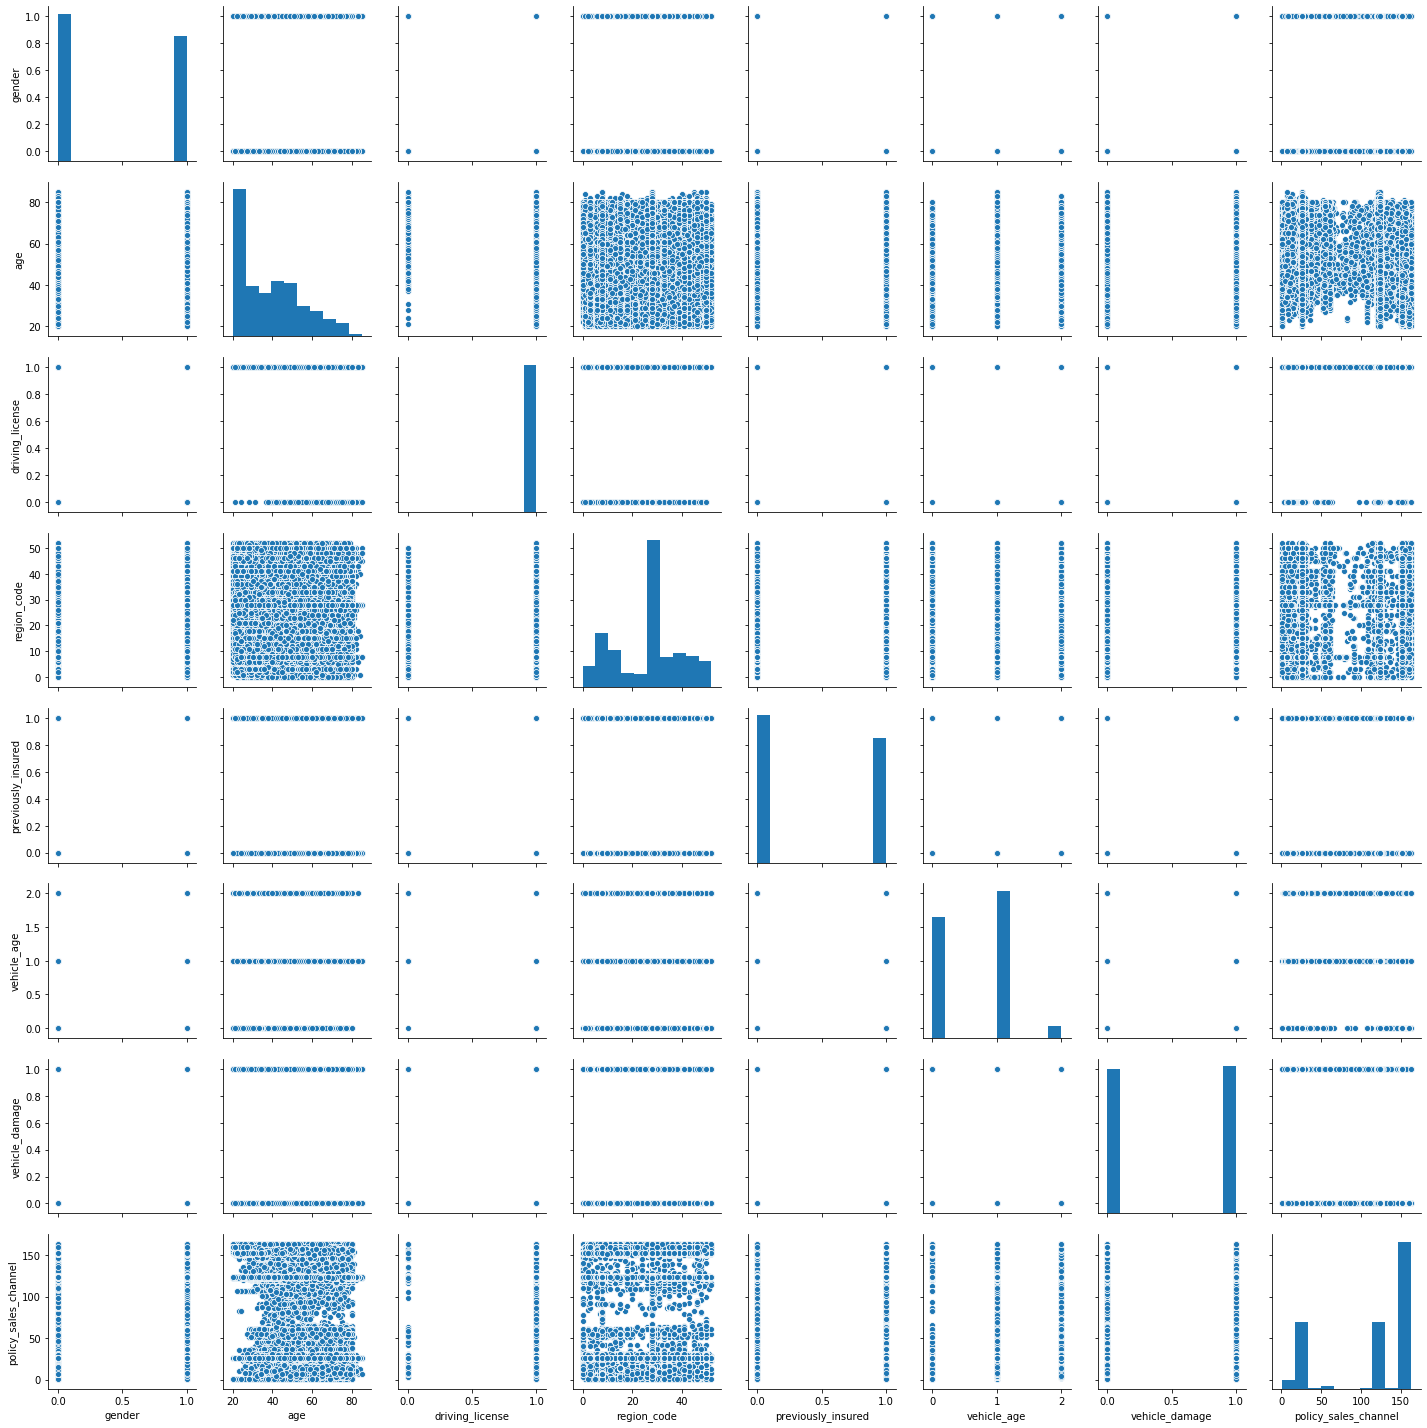

In [23]:
plt.figure(figsize=(12,8))
sns.pairplot(data=x1)

In [24]:
df.vehicle_age.astype('category').cat.codes

0         2
1         1
2         2
3         0
4         0
         ..
381104    1
381105    0
381106    0
381107    2
381108    1
Length: 381109, dtype: int8

In [25]:
df.gender.astype('category').cat.codes

0         0
1         0
2         0
3         0
4         1
         ..
381104    0
381105    0
381106    0
381107    1
381108    0
Length: 381109, dtype: int8

In [26]:
df.vehicle_damage.astype('category').cat.codes

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    1
381108    0
Length: 381109, dtype: int8